# **YOLO-NAS-POSE model from https://deci.ai/**


In [1]:
!pip install super-gradients
!pip install -U git+https://github.com/ytdl-org/youtube-dl.git

  Cloning https://github.com/ytdl-org/youtube-dl.git to /tmp/pip-req-build-ah0ptqk0
  Running command git clone --filter=blob:none --quiet https://github.com/ytdl-org/youtube-dl.git /tmp/pip-req-build-ah0ptqk0
  Resolved https://github.com/ytdl-org/youtube-dl.git to commit 00ef748cc0e35ee60efd0f7a00e373ab8d1af86b
  Preparing metadata (setup.py) ... done


In [2]:
# Import important Library
import super_gradients
import torch
import os
import json
from pathlib import Path
import pathlib
import re
import random
import cv2
import gdown
import yaml
from IPython.display import YouTubeVideo
from google.colab.patches import cv2_imshow

The console stream is logged into /root/sg_logs/console.log


[2023-11-10 19:08:05] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-10 19:08:05] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-10 19:08:05] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-11-10 19:08:13] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-10 19:08:13] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-10 19:08:13] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [3]:
# choose device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Inference with YOLO-NAS-POSE

In [4]:
# instantiating YOLO-NAS-Pose pretrained model.

from super_gradients.training import models
from super_gradients.common.object_names import Models

yolo_nas_pose = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose").cuda()

[2023-11-10 19:08:25] INFO - checkpoint_utils.py - License Notification: YOLO-NAS-POSE pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS-POSE.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-10 19:08:25] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_pose_l


# **Inference on Image**

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
[2023-11-10 19:08:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


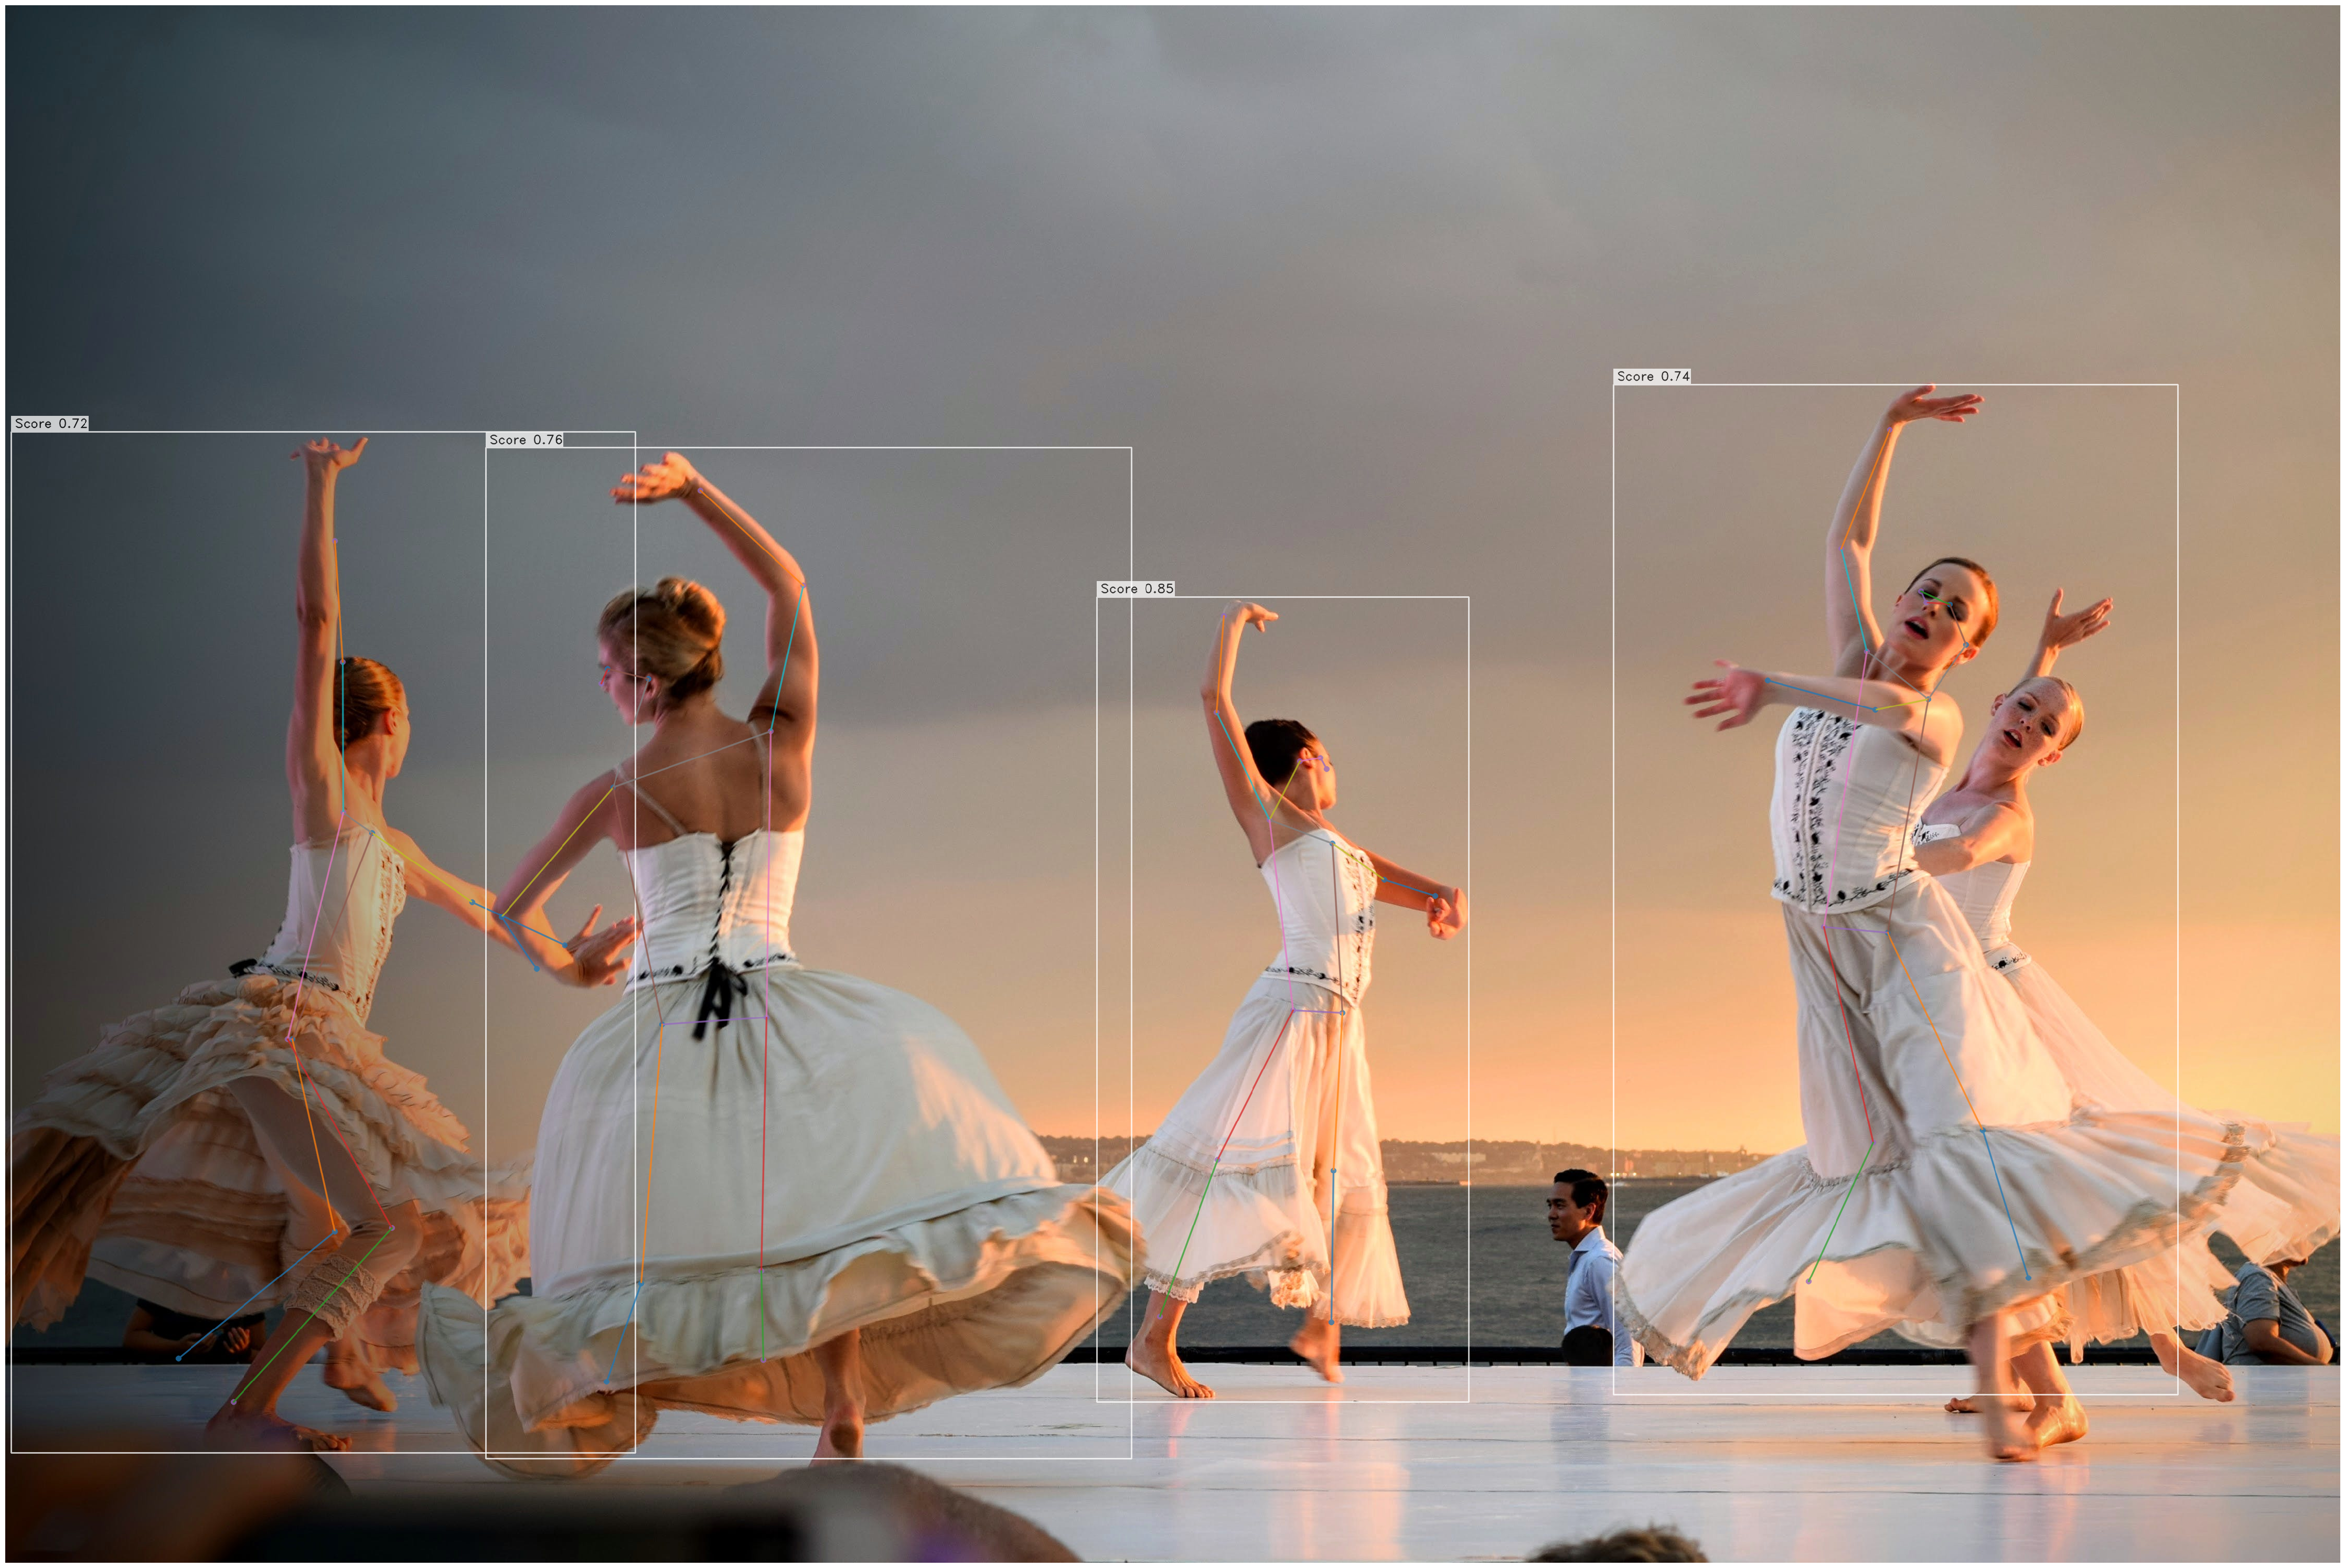

In [5]:
image = "1.jpg"
result = yolo_nas_pose.predict(image, conf=0.60)
result.show()
result.save("image_output")

# **Inference on Video**

In [6]:
video = "3.mp4"
result = yolo_nas_pose.predict(video, conf=0.60)
result.save("video_output")

Predicting Video: 100%|██████████| 5323/5323 [02:36<00:00, 34.12it/s]
/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/visualization/pose_estimation.py:67: RuntimeWarning: Mean of empty slice.
  pose_center = keypoints[keypoints_to_show_mask].mean(axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
[2023-11-10 19:12:46] INFO - video.py - Output path "video_output" does not have a video extension, and therefore will be saved as video_output.mp4


# **Inference on an WebCam**

In [ ]:
from super_gradients.training import models

# Initialize the model with pretrained weights for CPU
model = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose")

#model = model.to('cpu')
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

try:
    model.predict_webcam()
except Exception as e:
    print(f"An error occurred: {e}")